<a href="https://colab.research.google.com/github/AnyueWang/BCG_Project/blob/main/Feature_Engineering_and_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering and Model Development

---

1. Import packages
2. Load data
3. Feature engineering
4. Model development
5. Discussion
6. Summary

---



## 1. Import packages

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import sklearn
import tensorflow as tf

---
## 2. Load data

In [130]:
df = pd.read_csv('https://raw.githubusercontent.com/AnyueWang/BCG_Project/main/clean_data_after_eda.csv',)
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [131]:
df = df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14605 non-null  object        
 1   channel_sales                   14605 non-null  object        
 2   cons_12m                        14605 non-null  int64         
 3   cons_gas_12m                    14605 non-null  int64         
 4   cons_last_month                 14605 non-null  int64         
 5   date_activ                      14605 non-null  datetime64[ns]
 6   date_end                        14605 non-null  datetime64[ns]
 7   date_modif_prod                 14605 non-null  datetime64[ns]
 8   date_renewal                    14605 non-null  datetime64[ns]
 9   forecast_cons_12m               14605 non-null  float64       
 10  forecast_cons_year              14605 non-null  int64         
 11  fo

In [133]:
sen_df = pd.read_csv('https://raw.githubusercontent.com/AnyueWang/BCG_Project/main/sen_data.csv')
sen_df = sen_df.drop(columns=['Unnamed: 0'],axis=1)
sen_df.head()

,id,sen_off_peak_var,sen_peak_var,sen_mid_peak_var,sen_off_peak_fix,sen_peak_fix,sen_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0.00000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,-0.00000,NaN,NaN,0.000000,NaN,NaN
2,764c75f661154dac3a6c254cd082ea7d,-0.00000,0.000000,NaN,0.000000,NaN,NaN
3,bba03439a292a1e166f80264c16191cb,-0.00000,NaN,NaN,0.000000,NaN,NaN
4,149d57cf92fc41cf94415803a877cb4b,-76498.70801,-205768.896612,135841.697734,2907.517758,4845.862929,7268.794394


In [134]:
sen_df.replace(np.nan,0,inplace=True)
sen_df.replace(np.inf,0,inplace=True)
sen_df.replace(-np.inf,0,inplace=True)
sen_df.head(10)

,id,sen_off_peak_var,sen_peak_var,sen_mid_peak_var,sen_off_peak_fix,sen_peak_fix,sen_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,-0.000000,-0.000000,0.000000e+00,-0.000000,-0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,-0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,-0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,-0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,-76498.708010,-205768.896612,135841.697734,2.907518e+03,4845.862929,7268.794394
5,1aa498825382410b098937d65c4ec26d,-224655.620131,-429704.351939,0.000000,-1.513992e+09,0.000000,0.000000
6,7ab4bf4878d8f7661dfc20e9b8e18011,-0.000000,-0.000000,0.000000,0.000000e+00,0.000000,0.000000
7,01495c955be7ec5e7f3203406785aae0,-152463.786694,-409562.672176,399117.449664,7.300529e+03,12167.547695,18251.321543
8,f53a254b1115634330c12c7fdbf7958a,-0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
9,10c1b2f97a2d2a6f10299dc213d1a370,-275803.558918,-915539.534884,509554.750194,0.000000e+00,0.000000,0.000000


In [135]:
df = df.merge(sen_df,on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,sen_off_peak_var,sen_peak_var,sen_mid_peak_var,sen_off_peak_fix,sen_peak_fix,sen_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,42.629663,12.311304,8.182687,1,0.00000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.592310,0.000000,0.000000,0,-0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.612508,0.088409,0.000000,0,-0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.593296,0.000000,0.000000,0,-0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,40.848791,24.539003,16.365274,0,-76498.70801,-205768.896612,135841.697734,2907.517758,4845.862929,7268.794394


---

## 3. Feature engineering



### 3.1 Difference between off-peak prices in December and preceding January



We first focus on feature of difference between off-peak prices in December and preceding January, which has great influence on price sensitivity.

In [136]:
price_df = pd.read_csv('https://raw.githubusercontent.com/AnyueWang/BCG_Project/main/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [137]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [138]:
df_diff = df.merge(diff, on='id')
df_diff.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,mean_3m_price_p3,churn,sen_off_peak_var,sen_peak_var,sen_mid_peak_var,sen_off_peak_fix,sen_peak_fix,sen_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,...,14605.000000,14605.000000,1.460500e+04,1.460500e+04,1.460500e+04,1.460500e+04,1.460500e+04,1.460500e+04,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085,...,6.144134,0.097159,-2.644603e+06,1.571087e+06,-3.546701e+06,-1.034714e+09,-4.120461e+08,-1.613349e+08,-0.004566,0.278502
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140,...,7.866460,0.296184,4.226115e+07,1.623279e+08,1.641372e+08,1.747330e+10,5.796169e+09,2.817212e+09,0.012049,1.349277
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-3.638425e+08,-7.819982e+09,-6.489893e+09,-4.651000e+11,-1.928499e+11,-8.838953e+10,-0.148477,-44.266931
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,0.000000,0.000000,-4.909445e+05,-2.949280e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.007829,0.000004
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378,...,0.000000,0.000000,-9.197923e+04,0.000000e+00,0.000000e+00,3.691249e+02,0.000000e+00,0.000000e+00,-0.005344,0.162916
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378,...,16.365180,0.000000,0.000000e+00,0.000000e+00,1.150280e+05,1.340739e+04,1.251773e+02,2.762166e+02,-0.003520,0.177779
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,17.382386,1.000000,2.454441e+09,1.046009e+10,2.195008e+09,1.414233e+11,4.565044e+09,9.679376e+10,0.168958,40.728885


### 3.2 Log-scale operation on consumptions, forecasts, and price sensitivities



In EDA, we found that the log-scale operation on consumptions and forecasts can alleviate the impacts of skewed distribution and outliers. In this part, we process the consumption and forecast variables by log-scale operation.

In [139]:
forecast_col = ['forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m', 
          'forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']
cons_col = ['cons_12m','cons_gas_12m','cons_last_month']

df_diff[forecast_col+cons_col] = np.log10(df_diff[forecast_col+cons_col]+1)
df_diff.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3,churn,sen_off_peak_var,sen_peak_var,sen_mid_peak_var,sen_off_peak_fix,sen_peak_fix,sen_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.000000,4.739944,0.000000,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,...,8.182687,1,0.00000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,3.668479,0.000000,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,...,0.000000,0,-0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.000000,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,...,0.000000,0,-0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.000000,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,...,0.000000,0,-0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,3.646011,0.000000,2.721811,2010-01-13,2016-03-07,2010-01-13,2015-03-09,2.650065,...,16.365274,0,-76498.70801,-205768.896612,135841.697734,2907.517758,4845.862929,7268.794394,-0.006192,0.162916


### 3.3 One-hot encoding for categorical variables



Categorical variables, `channel_sales`, `has_gas`, `origin_up`, are processed by one-hot encoder.

In [140]:
df_diff['has_gas'] = df_diff['has_gas'].replace({'t':1,'f':0})
df_diff['has_gas']

0        1
1        0
2        0
3        0
4        0
        ..
14600    1
14601    0
14602    0
14603    0
14604    0
Name: has_gas, Length: 14605, dtype: int64

In [141]:
df_diff['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

The last three categories can be abandoned due to their low frequencies.

In [142]:
df_diff = pd.get_dummies(df_diff, columns=['channel_sales'],prefix='channel')

In [143]:
df_diff.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds','channel_epumfxlbckeskwekxbiuasklxalciiuu','channel_fixdbufsefwooaasfcxdxadsiekoceaa'], inplace=True)

In [144]:
df_diff.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var',
       'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3',
       'mean_3m_price_p1_var

In [145]:
df_diff['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

The last three categories can be abandoned due to their low frequencies.

In [146]:
df_diff = pd.get_dummies(df_diff, columns=['origin_up'],prefix='origin')

In [147]:
df_diff.drop(columns=['origin_MISSING','origin_usapbepcfoloekilkwsdiboslwaxobdp','origin_ewxeelcelemmiwuafmddpobolfuxioce'], inplace=True)

In [148]:
df_diff.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2

### 3.4 Duration calculation of some specific dates

For date-related data, we calculate the duration from the date w.r.t. the reference date. Note that the `churn` results happen during the first three months of 2016. So the reference date for duration calculation is set as `2016-01-01`.

In [149]:
ref_date = datetime(2016,1,1)
ref_date

datetime.datetime(2016, 1, 1, 0, 0)

Since `num_years_antig` is related to the `date_activ`, we only calculate duration from `date_end`, `date_modif_prod`, `date_renewal` to `ref_date`.

In [150]:
date_col = ['date_end', 'date_modif_prod', 'date_renewal']
duration_col = ['duration_end', 'duration_modif_prod', 'duration_renewal']

for i, col in enumerate(date_col):
  duration = pd.to_datetime(df_diff[col]) - ref_date
  df_diff[duration_col[i]] = duration

df_diff[duration_col].head()

,duration_end,duration_modif_prod,duration_renewal
0,166 days,-61 days,-192 days
1,242 days,-2324 days,-123 days
2,106 days,-2086 days,-259 days
3,89 days,-2103 days,-276 days
4,66 days,-2179 days,-298 days


In [151]:
for col in duration_col:
  df_diff[col] = df_diff[col].dt.days

In [152]:
df_diff[duration_col].head()

,duration_end,duration_modif_prod,duration_renewal
0,166,-61,-192
1,242,-2324,-123
2,106,-2086,-259
3,89,-2103,-276
4,66,-2179,-298


In [153]:
df_diff.drop(columns=date_col+['date_activ'],inplace=True)

### 3.5 Correlation heatmap among variables

We check the correlation among variables via the corresponding heatmap. Variables with high correlation with others can be removed for model simplicity.

In [154]:
df_diff.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2_var',
       'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_

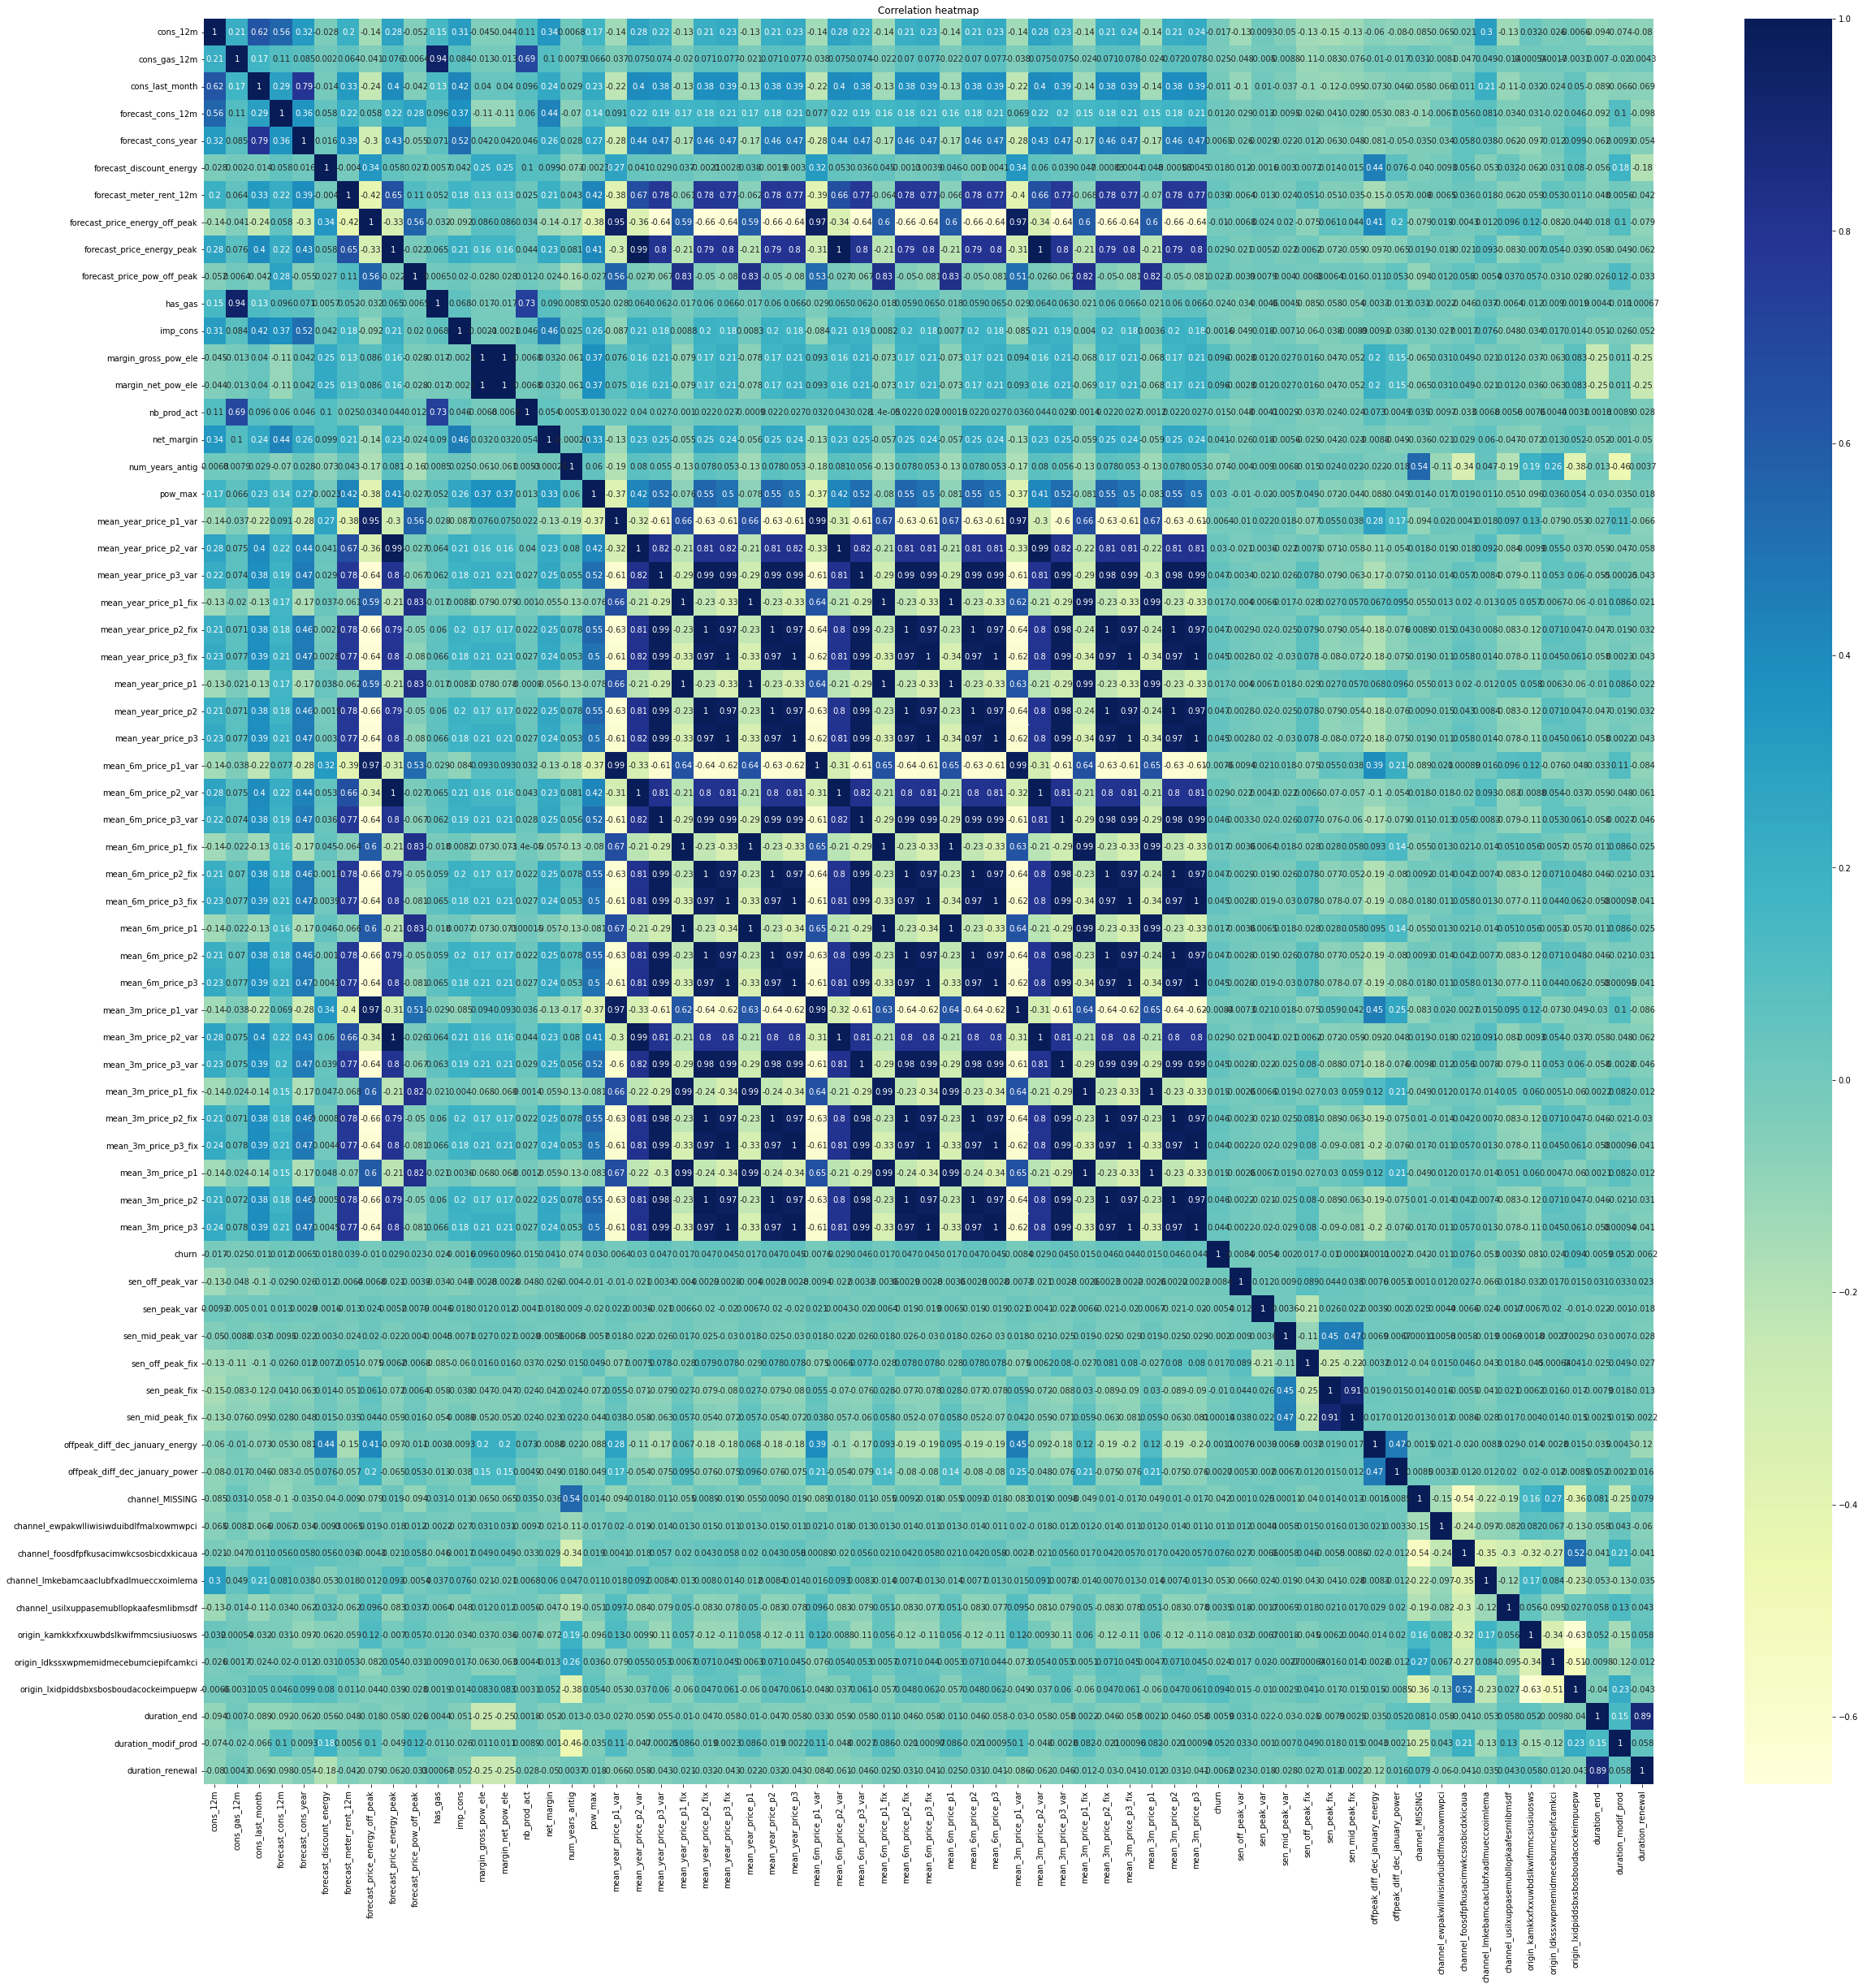

In [155]:
corr = df_diff.corr()

fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,cmap='YlGnBu')
plt.title('Correlation heatmap')
plt.show()

Drop variables that are highly correlated to others. For example, we observe that mean-year-price variables have strong relationships with each other. Thus we can just keep some of them.

In [156]:
df_new = df_diff.drop(columns=['cons_last_month','mean_6m_price_p1_var','mean_6m_price_p2_var','mean_6m_price_p3_var',
                  'mean_6m_price_p1_fix','mean_6m_price_p2_fix','mean_6m_price_p3_fix',
                  'mean_6m_price_p1','mean_6m_price_p2','mean_6m_price_p3',
                  'mean_3m_price_p1_var','mean_3m_price_p2_var','mean_3m_price_p3_var',
                  'mean_3m_price_p1_fix','mean_3m_price_p2_fix','mean_3m_price_p3_fix',
                  'mean_3m_price_p1','mean_3m_price_p2','mean_3m_price_p3','duration_end',
                  'forecast_price_energy_off_peak','forecast_price_energy_peak',
                  'mean_year_price_p1','mean_year_price_p2','mean_year_price_p3',
                  'mean_year_price_p1_fix','mean_year_price_p2_fix','mean_year_price_p3_fix',
                  'margin_gross_pow_ele','mean_year_price_p3_var','has_gas','sen_peak_fix','sen_mid_peak_fix'])

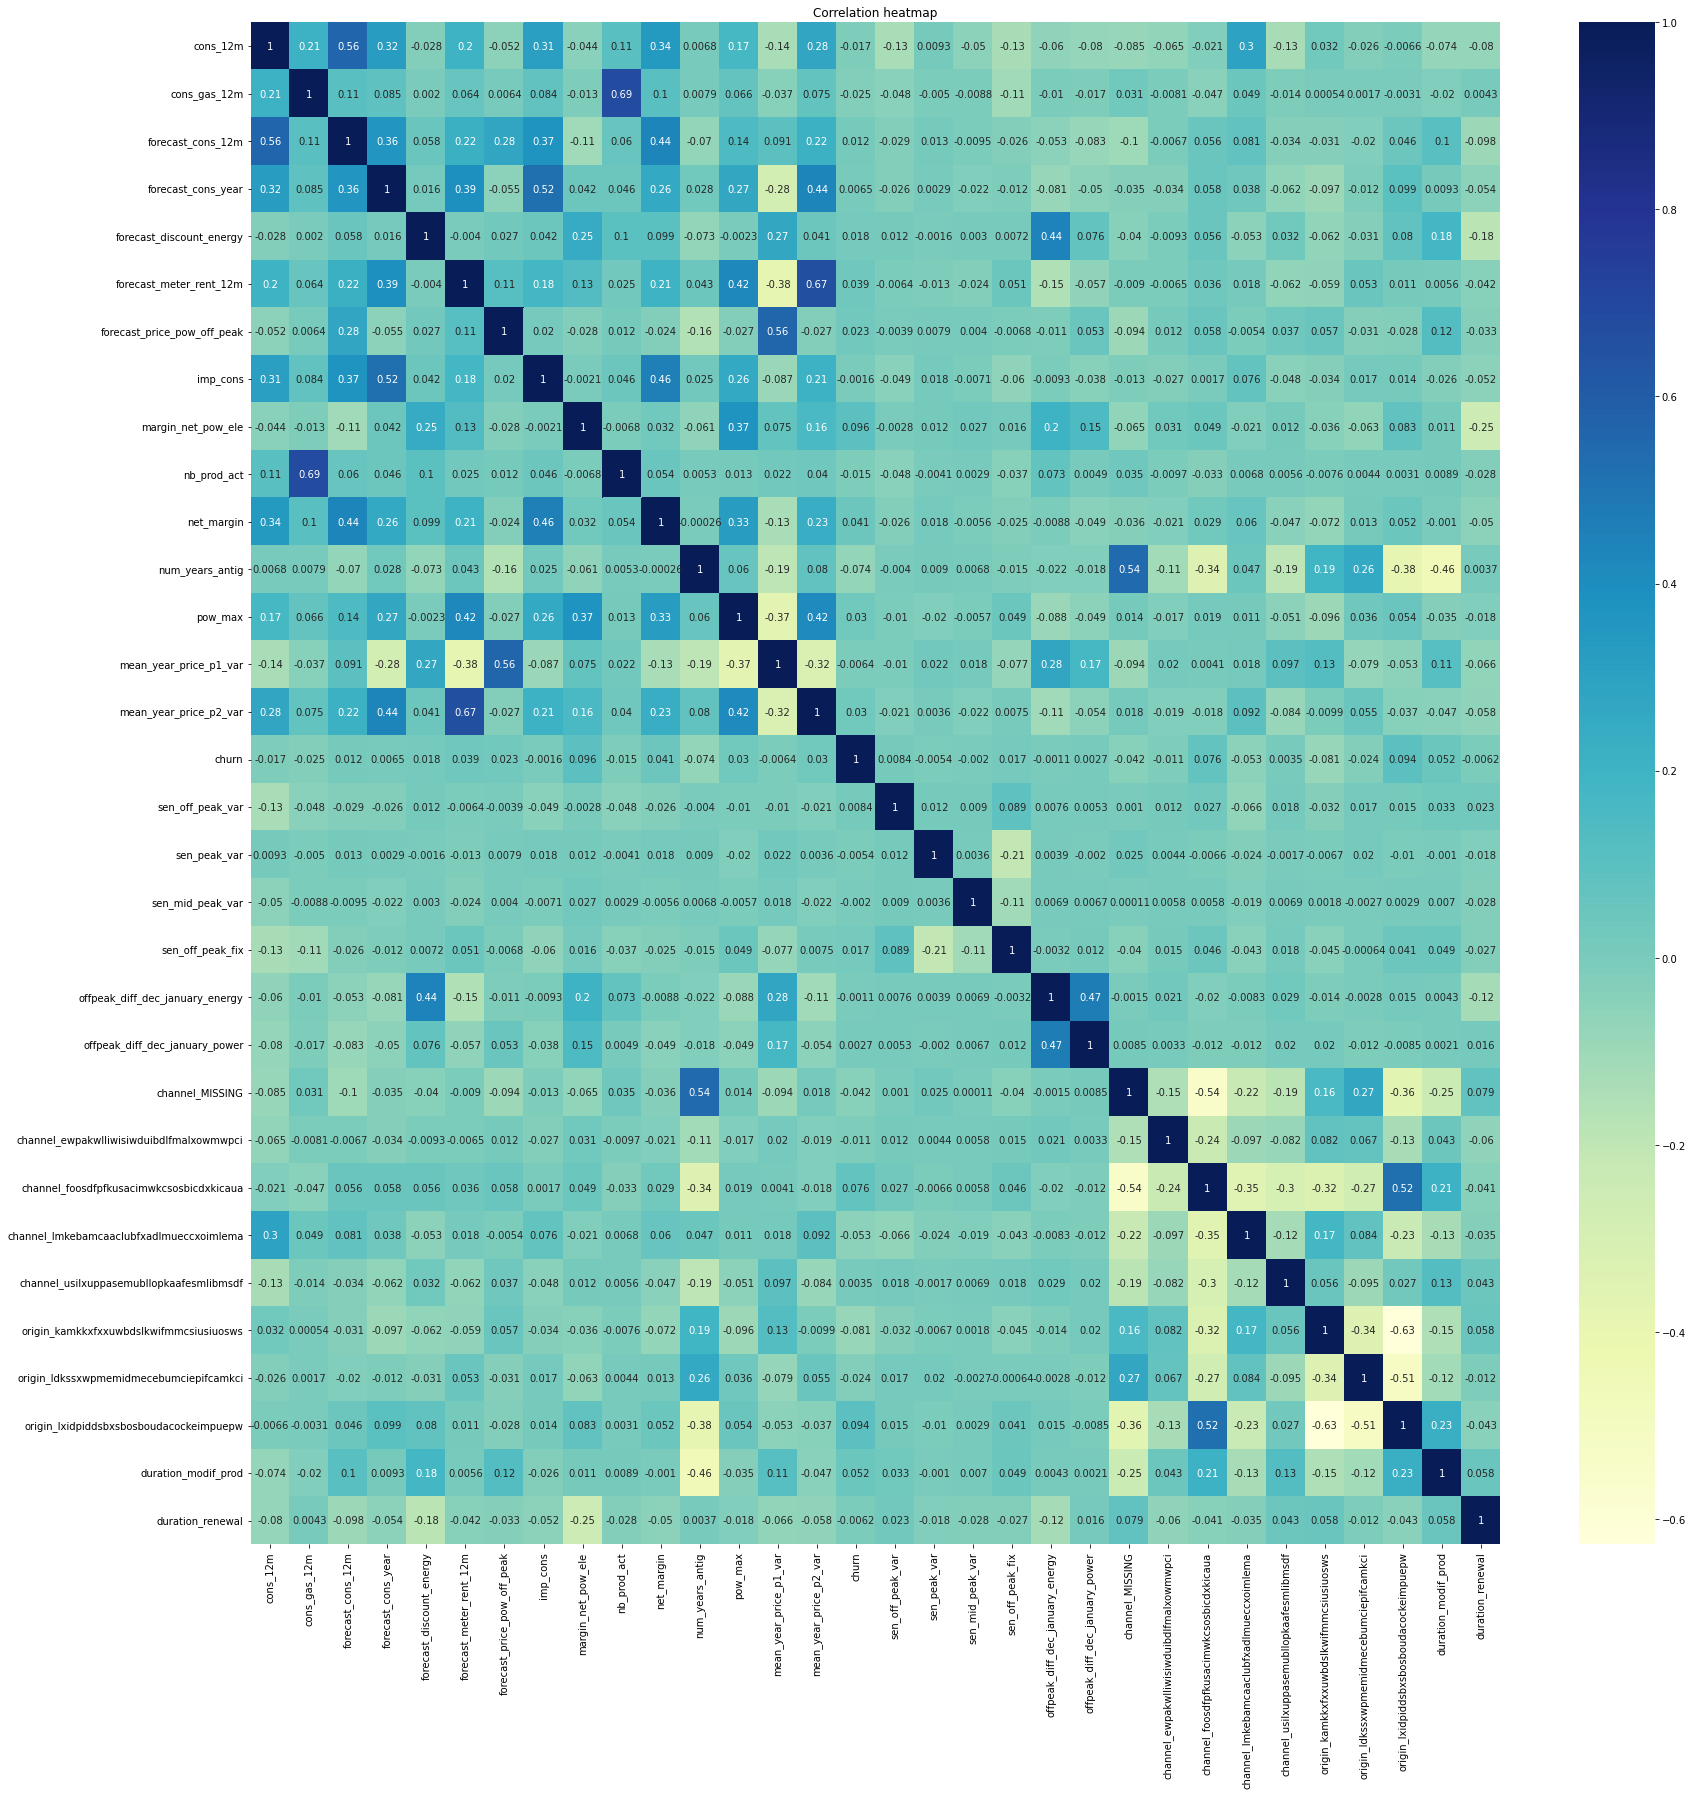

In [157]:
corr = df_new.corr()

fig, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='YlGnBu')
plt.title('Correlation heatmap')
plt.show()

### 3.5 Upsampling for data imbalance

As found in EDA, the churn and non-churn data are imbalance, with over 90% companies stay retention for the upcoming three months. For more comprehensive modeling, we are motivated to upsample the data of churning.

In [158]:
df_new['churn'].value_counts()

0    13186
1     1419
Name: churn, dtype: int64

In [159]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df_new[(df_new['churn']==0)] 
df_minority = df_new[(df_new['churn']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=13186, random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

## 4. Model development

### 4.1 Model evaluation

In this section, we develop several classification models to predict conpanies' churning, including deep neural networks, random forest, support vector machine, k-nearest neighbors. The metrics we focus on are accuracy, precision, and recall.

In [284]:
X = df_upsampled.drop(columns=['churn'])
y = df_upsampled.churn

a. Deep neural networks

In [161]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [247]:
# Preprocess the data, normalization
ct = make_column_transformer(
    (MinMaxScaler(),['cons_12m','cons_gas_12m','forecast_cons_12m','forecast_cons_year','forecast_discount_energy',
             'forecast_meter_rent_12m','forecast_price_pow_off_peak','imp_cons',
             'margin_net_pow_ele','nb_prod_act','net_margin','num_years_antig',
             'pow_max','mean_year_price_p1_var','mean_year_price_p2_var',
             'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power',
             'duration_modif_prod','duration_renewal','sen_off_peak_var','sen_peak_var','sen_mid_peak_var','sen_off_peak_fix']),
    remainder='passthrough'
)

In [248]:
ct.fit(X)
X_norm = ct.transform(X)
X_norm[0]

array([0.63006189, 0.        , 0.6607268 , 0.        , 0.        ,
       0.44605182, 0.93041427, 0.        , 0.00747384, 0.        ,
       0.00627782, 0.41666667, 0.02239343, 0.59721867, 0.44139096,
       0.45316049, 0.52081305, 0.51592083, 0.9397463 , 0.12910074,
       0.42778733, 0.74726158, 0.76682962, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [249]:
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42) #
X_norm_val, X_norm_test, y_val, y_test = train_test_split(X_norm_test, y_test, test_size=0.5, random_state=42) #
X_norm_train.shape, X_norm_val.shape, X_norm_test.shape, y_train.shape, y_val.shape, y_test.shape

((18460, 31), (3956, 31), (3956, 31), (18460,), (3956,), (3956,))

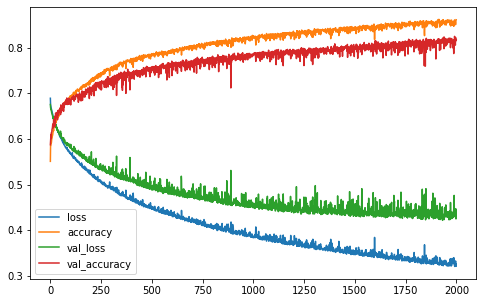

In [168]:
tf.random.set_seed(42)

model_dnn = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_dnn.compile(loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])#,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()
    
history = model_dnn.fit(X_norm_train,y_train,epochs=2000,validation_data=(X_norm_val,y_val),steps_per_epoch=21,validation_steps=32,verbose=0)

pd.DataFrame(history.history).plot(figsize=(8,5))

In [169]:
pred_dnn = model_dnn.predict(X_norm_test)

124/124 [==============================] - 0s 963us/step


In [170]:
print(f'The accuracy of DNN is {sum(np.round(tf.squeeze(pred_dnn))==y_test)/len(pred_dnn)*100:.2f}%')

The accuracy of DNN is 79.73%


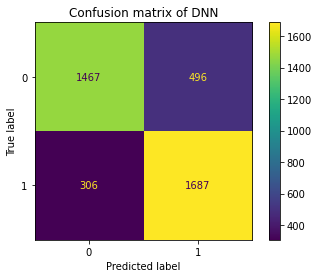

In [171]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,np.round(pred_dnn))).plot()
plt.title('Confusion matrix of DNN')
plt.show()

In [172]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,np.round(pred_dnn)).ravel()


print(f'The precision of DNN is {tp/(tp+fp)*100:.2f}%')
print(f'The recall of DNN is {tp/(tp+fn)*100:.2f}%')

The precision of DNN is 77.28%
The recall of DNN is 84.65%


* DNN might be too complex to this problem, with long training time, tedious hyperparameter adjusting, and model overfitting. The performance on testing data is as good as we expect.

b. Support vector machine

In [250]:
from sklearn.svm import SVC

model_svm = SVC(random_state=42)
model_svm.fit(X_norm_train,y_train)

SVC(random_state=42)

In [251]:
print(f'The accuracy of SVM is {model_svm.score(X_norm_test,y_test)*100:.2f}%')

The accuracy of SVM is 61.27%


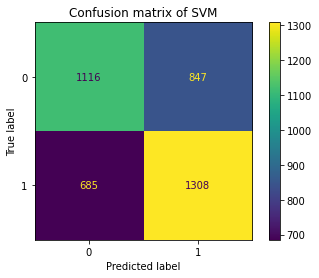

In [252]:
pred_svm = model_svm.predict(X_norm_test)
ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,pred_svm)).plot()
plt.title('Confusion matrix of SVM')
plt.show()

In [253]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,np.round(pred_svm)).ravel()


print(f'The precision of SVM is {tp/(tp+fp)*100:.2f}%')
print(f'The recall of SVM is {tp/(tp+fn)*100:.2f}%')

The precision of SVM is 60.70%
The recall of SVM is 65.63%


* Compared to DNN, the performance of SVM is worse in accuracy, precision, and recall.

c. Random forest

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42) #
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((18460, 31), (3956, 31), (3956, 31), (18460,), (3956,), (3956,))

In [255]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [256]:
print(f'The accuracy of random forest is {model_rf.score(X_test,y_test)*100:.2f}%')

The accuracy of random forest is 99.39%


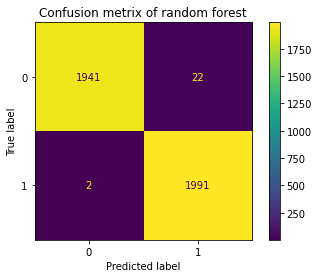

In [257]:
pred_rf = model_rf.predict(X_test)
ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,pred_rf)).plot()
plt.title('Confusion metrix of random forest')
plt.show()

In [258]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,np.round(pred_rf)).ravel()


print(f'The precision of random forest is {tp/(tp+fp)*100:.2f}%')
print(f'The recall of random forest is {tp/(tp+fn)*100:.2f}%')

The precision of random forest is 98.91%
The recall of random forest is 99.90%


* The performance of random forest on this predictive model is impressively good, with 99.39% accuracy on test data. The precision and recall are both low, with only 22 false-positive and 2 false-negative cases. The overfitting issue is addressed by ensemble techniques and the training time is reduced compared to the DNN model.

d. K-nearest neighbors

In [259]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
model_knn.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [260]:
print(f'The accuracy of KNN is {model_knn.score(X_test,y_test)*100:.2f}%')

The accuracy of KNN is 88.93%


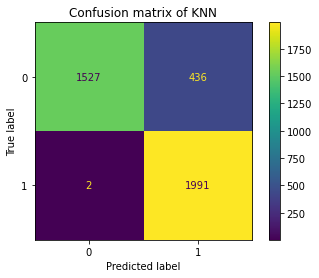

In [261]:
pred_knn = model_knn.predict(X_test)
ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,pred_knn)).plot()
plt.title('Confusion matrix of KNN')
plt.show()

In [262]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,np.round(pred_knn)).ravel()


print(f'The precision of KNN is {tp/(tp+fp)*100:.2f}%')
print(f'The recall of KNN is {tp/(tp+fn)*100:.2f}%')

The precision of KNN is 82.04%
The recall of KNN is 99.90%


* It seems the KNN model outperforms the others in reducing type II error and keep the number of false-negative cases to 2. But unfortunately, the precision is low.

e. Findings

From the above model development, we have the following findings to discuss:
1. In conclusion, random forest takes the lead in predicting the churning of companies. 
2. Compared to other model, random forest model outperform the others in accuracy (99.39%), precision (98.91%), and recall (99.90%).
4. Random forest has good performance in addressing overfitting.
5. One may concern the training time if we have more data and features for training. For the provided data sets, a good trade-off between performance and complexity is achieved.

### 4.6 Model Analysis



For better understanding the trained model, we evaluate the importance of the input features.

In [263]:
feature_importances = pd.DataFrame({'features':X_train.columns,
                     'importance':model_rf.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()


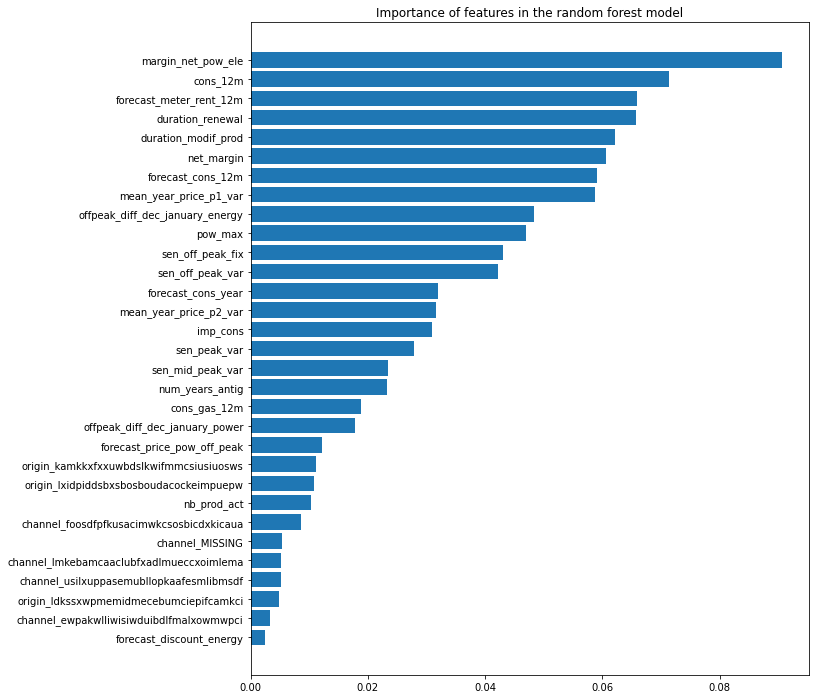

In [264]:
fig, ax = plt.subplots(figsize=(10,12))
plt.barh(range(len(feature_importances)),feature_importances['importance'])
plt.yticks(range(len(feature_importances)),feature_importances['features'])
plt.title('Importance of features in the random forest model')
plt.show()

We can observe that `margin_net_pow_ele` and `cons_12m` are the most important in this model. Those might be the most significant factors that companies will consider to make their financial decisions. Factors like sales channels and original subscribed suppliers show less importance in this model. We may remove them to simplify the model.

Regarding the hypothesis that the client made:

> Churn or not is driven by the customers' price sensitivity.

We can observe that price sensitivity has some impact on churn but the word 'driven' is too strong.

In the following, we try to develop a new model without the input of those less-important features and evaluate the performance.

In [379]:
# ct_new = make_column_transformer(
#     (MinMaxScaler(),['cons_12m','forecast_cons_12m',
#              'forecast_meter_rent_12m',
#              'margin_net_pow_ele','net_margin',
#              'pow_max','mean_year_price_p1_var',
#              'offpeak_diff_dec_january_energy',
#              'duration_modif_prod','duration_renewal','sen_off_peak_fix','sen_off_peak_var']),#'forecast_price_pow_off_peak','offpeak_diff_dec_january_power','cons_gas_12m',
#                                     #'num_years_antig','mean_year_price_p2_var','forecast_cons_year','imp_cons','sen_peak_var','sen_mid_peak_var','sen_off_peak_fix'
# )

# ct_new.fit(X)
# X_norm_new = ct_new.transform(X)
# X_norm_new[0]

X_new = X[['id','cons_12m','forecast_cons_12m',
       'forecast_meter_rent_12m',
       'margin_net_pow_ele','net_margin',
       'pow_max','mean_year_price_p1_var',
       'offpeak_diff_dec_january_energy',
       'duration_modif_prod','duration_renewal','sen_off_peak_fix','sen_off_peak_var']]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42, shuffle=True) #
X_val_new, X_test_new, y_val_new, y_test_new = train_test_split(X_test_new, y_test_new, test_size=0.5, random_state=42, shuffle=True) #

In [360]:
model_rf_new = RandomForestClassifier(random_state=42,n_estimators=100)
model_rf_new.fit(X_train_new.drop(columns=['id']),y_train_new)

RandomForestClassifier(random_state=42)

In [361]:
input = X_test_new.drop(columns=['id'])
print(f'The accuracy of the new model is {model_rf_new.score(input,y_test_new)*100:.2f}%')

The accuracy of the new model is 99.42%


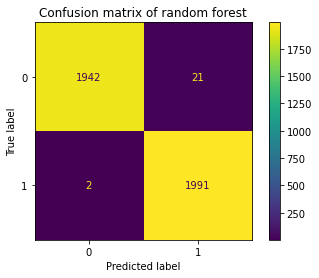

In [362]:
pred_rf_new = model_rf_new.predict(input)
ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_new,pred_rf_new)).plot()
plt.title('Confusion matrix of random forest')
plt.show()

In [363]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,np.round(pred_rf_new)).ravel()


print(f'The precision of new model is {tp/(tp+fp)*100:.2f}%')
print(f'The recall of new model is {tp/(tp+fn)*100:.2f}%')

The precision of new model is 98.96%
The recall of new model is 99.90%


In the new model, we only keep the top 11 important features and remove the other less important features. The model has a little better performance with 99.42% accuracy, 98.96% precision, and 99.90% recall.

---

## 5. Discussion

The client plans to propose a 20% discount offer to customers which are predicted to churn. In this section, we will check whether the 20% discount offer to customers predicted churning is a good measure. We first apply the model to predict the churning with the input of the whole dataset.

In [ ]:
pred_rf_new_all = model_rf_new.predict(X_new.drop(columns='id'))
X_new['churn'] = y
X_new['pred_churn'] = pred_rf_new_all.tolist()


In [381]:
# Drop duplicated data generated by upsampling
X_fore = X_new.merge(df[['id','forecast_price_energy_off_peak']], on='id').drop_duplicates()

In [382]:
X_fore.head()

,id,cons_12m,forecast_cons_12m,forecast_meter_rent_12m,margin_net_pow_ele,net_margin,pow_max,mean_year_price_p1_var,offpeak_diff_dec_january_energy,duration_modif_prod,duration_renewal,sen_off_peak_fix,sen_off_peak_var,churn,pred_churn,forecast_price_energy_off_peak
0,142edc11636f47050629bed7f19560a6,4.279941,3.249834,1.239299,2.80,154.25,10.392,0.166085,-0.004628,-2222,-30,-0.000000,-0.000000e+00,1,1,0.165022
13,3a91f9ace68e9f493855af3215347d9a,4.586587,3.601916,2.556604,116.79,447.80,110.000,0.122786,-0.007801,-1340,-244,16720.252695,-3.491847e+05,1,1,0.115174
19,62d14470b878e0468831a03833de72a6,4.925451,3.929655,2.132100,2.79,936.95,43.640,0.124897,-0.010412,-555,-50,0.000000,-6.520957e+05,1,1,0.114658
31,4d456153f156b6225f7da69e8d103c58,3.934296,3.021049,1.280578,34.68,94.69,13.856,0.166273,0.001395,-830,-96,656.294936,5.541004e+05,1,1,0.167086
41,5c659c021d336b8acc49cf2eb47f2281,5.179581,3.726258,0.000000,35.59,540.91,39.830,0.124734,-0.007269,-554,-298,0.000000,-1.300118e+06,1,1,0.116900


Calculate the revenue without any customers churning.

In [398]:
X_fore['revenue_12m'] = (np.power(10,X_fore['forecast_cons_12m'])-1)*(np.power(10,X_fore['forecast_price_energy_off_peak']-1))+np.power(10,X_fore['forecast_meter_rent_12m']-1)

Calculate the actual loss when no discount method is applied.

In [399]:
X_fore['revenue_churn'] = X_fore['revenue_12m']*2/12*X_fore['churn']+X_fore['revenue_12m']*(1-X_fore['churn'])

In [400]:
actual_loss = sum(X_fore['revenue_12m'] - X_fore['revenue_churn'])
print(f'The actual loss without any response methods is {actual_loss:.2f}')

The actual loss without any response methods is 322921.42


Calculate the loss when the predictive model is perfect with 100% accuracy and 20% discount is applied.

In [401]:
X_fore['revenue_discounted_ideal'] = X_fore['revenue_12m']*0.8*X_fore['churn']+X_fore['revenue_12m']*(1-X_fore['churn'])

In [407]:
ideal_loss = sum(X_fore['revenue_12m'] - X_fore['revenue_discounted_ideal'])
print(f'The loss when predictive model is with 100% accuracy is {ideal_loss:.2f}')

The loss when predictive model is with 100% accuracy is 77501.14


Calculate the loss when our built model is applied and 20% discount is applied.

In [409]:
X_fore['revenue_discounted'] = X_fore['revenue_12m']*0.8*X_fore['pred_churn']+X_fore['revenue_12m']*(1-X_fore['pred_churn'])

X_fore['revenue_actual'] = X_fore['revenue_discounted']
# False Negative
X_fore[X_fore['churn']==1][X_fore['pred_churn']==0]['revenue_actual'] = X_fore[X_fore['churn']==1][X_fore['pred_churn']==0]['revenue_actual']*2/12
#X_fore['revenue_actual'] = X_fore[(X_fore.churn & (~X_fore.pred_churn)).tolist(), ['revenue_actual']]*2/12


<ipython-input-409-3b3b7e3fe152>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_fore[X_fore['churn']==1][X_fore['pred_churn']==0]['revenue_actual'] = X_fore[X_fore['churn']==1][X_fore['pred_churn']==0]['revenue_actual']*2/12


In [410]:
actual_loss_pred = sum(X_fore['revenue_12m'] - X_fore['revenue_actual'])
print(f'The loss with actual predictive model applied is {actual_loss_pred:.2f}')

The loss with actual predictive model applied is 80761.88


In [412]:
print(f'There is {actual_loss_pred-ideal_loss:.2f} more loss due to the imperfect prediction.')

There is 3260.74 more loss due to the imperfect prediction.


In [416]:
(77501.14-80761.88)/77501.14

-0.042073445629315975

Compared to no reaction to potential churning customers, proposing a 20% discount with the assistance of the learning model can save 242,159.54 and reduce the loss by 74.99%. We also notice that the applied predicted model cannot guarantee 100% accuracy, where it will cause a loss of 3260.74 (only 4.2%) compared to the perfect predictive model. A 20% discount is effective to reduce loss of customers and revenues. 

**Further discussion:** 
1. Whether 20% is an optimal number for preventing customers from churning is still unknown. To answer this question, more data is required. For example, each customer may have a specific expected value of discount for retention. The client can arrange some questionnaires to learn more about its customers.
2. The realistic model can be more complicated since we have assumptions that customers intending churning will definitely change their mind to stay when a 20% discount is offered. For further investigation, perhaps more sophisticated plan can be designed to keep the customers. 

## 6. Summary

To conclude, we leave the following key points:
1. A learning model based on random forest method is built to predict customers' churning, with 99.42% accuracy, 98.96% precision, and 99.90% recall.
2. In the designed model, features like `margin_net_pow_ele` and `cons_12m` contribute the most to the model. 
3. The price sensitivity has some impact on the learning model but not as important as we expected before. 
4. With the assistance of the predictve model applied, a 20% discount is effective to keep potential churning customers and reduce the revenue loss. But a more sophisticated strategy is needed for further improvement.